In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))



Saving mental_health_workplace_survey.csv to mental_health_workplace_survey.csv
User uploaded file "mental_health_workplace_survey.csv" with length 371354 bytes


In [ ]:
# Import all necessary libraries
import pandas as pd                 # For data manipulation
import numpy as np                  # For numerical computations
import seaborn as sns               # For advanced visualizations
import matplotlib.pyplot as plt     # For basic plotting
import warnings
from sklearn import preprocessing

from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LogisticRegression # Example classifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix

from sklearn.preprocessing import StandardScaler
#from sklearn.datasets import load_iris


# Settings to improve readability
warnings.filterwarnings("ignore")
sns.set(style="whitegrid")
pd.set_option('display.max_columns', None)




In [ ]:
# Load the dataset
df = pd.read_csv("mental_health_workplace_survey.csv")  # Replace with your local file path if needed

# Preview first few rows
df.head(25)


,EmployeeID,Age,Gender,Country,JobRole,Department,YearsAtCompany,WorkHoursPerWeek,RemoteWork,BurnoutLevel,JobSatisfaction,StressLevel,ProductivityScore,SleepHours,PhysicalActivityHrs,CommuteTime,HasMentalHealthSupport,ManagerSupportScore,HasTherapyAccess,MentalHealthDaysOff,SalaryRange,WorkLifeBalanceScore,TeamSize,CareerGrowthScore,BurnoutRisk
0,1001,50,Male,UK,Sales Associate,HR,14,47,No,3.37,5.06,9.47,4.16,7.0,7.9,117,No,3.15,Yes,8,40K-60K,8.82,6,9.20,0
1,1002,36,Male,Germany,Software Engineer,IT,1,59,Hybrid,7.39,2.00,5.65,3.74,7.2,9.0,8,Yes,4.40,Yes,4,80K-100K,2.80,45,8.46,1
2,1003,29,Non-binary,India,IT Admin,IT,13,59,Hybrid,7.10,7.17,5.70,8.80,5.2,9.7,75,No,3.63,No,6,80K-100K,7.28,7,7.96,1
3,1004,42,Male,Australia,HR Specialist,IT,15,31,Yes,4.18,3.76,6.40,4.69,8.7,5.8,43,Yes,4.50,Yes,9,60K-80K,1.31,11,8.90,0
4,1005,40,Male,Brazil,Customer Support,Support,6,34,Yes,8.28,2.34,3.41,2.12,4.2,3.3,58,Yes,5.51,Yes,6,<40K,1.17,18,8.88,1
5,1006,44,Prefer not to say,Germany,Project Manager,Support,3,58,Hybrid,3.12,4.81,4.45,1.09,8.5,3.2,23,Yes,2.56,No,6,40K-60K,5.06,38,4.32,0
6,1007,32,Prefer not to say,USA,Software Engineer,Engineering,17,30,Hybrid,5.15,9.68,5.98,7.50,5.9,3.8,62,No,4.54,Yes,9,100K+,6.91,12,9.76,0
7,1008,32,Male,Canada,Customer Support,Marketing,4,39,No,5.25,4.70,9.48,7.43,7.6,6.1,77,Yes,4.47,No,3,80K-100K,2.28,22,7.38,0
8,1009,45,Prefer not to say,Canada,Marketing Manager,Sales,5,49,Hybrid,4.07,4.13,6.78,4.76,7.3,4.9,112,No,3.57,No,3,80K-100K,7.87,3,4.33,0
9,1010,57,Prefer not to say,Brazil,Software Engineer,Engineering,6,59,Hybrid,9.59,5.00,4.00,2.14,4.8,6.5,40,Yes,9.99,No,2,60K-80K,2.16,19,4.98,1


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Keep the original dataframe with the target variable
original_df = df.copy()

# Separate features (X) and target (y) before one-hot encoding
X = original_df.drop('BurnoutRisk', axis=1)
y = original_df['BurnoutRisk']

# checking for categorical columns
categ_cols = X.select_dtypes(include='object').columns
#print(categ_cols)

# One-Hot Encoder
from sklearn.preprocessing import OneHotEncoder
X = pd.get_dummies(X, columns=categ_cols, drop_first=True)

numeric_df = X.select_dtypes(include='number')
corr_matrix1 = numeric_df.corr()
# original_data = corr_matrix1 # This variable is not used later, can be removed

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train: Decision tree, random forest, knn
--------------------------
-------------------------


In [ ]:
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "k-NN": KNeighborsClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name} Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print(f"{name} ROC AUC: {roc_auc_score(y_test, y_pred):.2f}\n")

Decision Tree Accuracy: 1.00
Decision Tree ROC AUC: 1.00

Random Forest Accuracy: 1.00
Random Forest ROC AUC: 1.00

k-NN Accuracy: 0.74
k-NN ROC AUC: 0.67



# Use correlation, mutual info, or Random Forest importances
-------------------
------------------

In [ ]:
# Building Random Forest Classifier
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

Accuracy: 100.00%


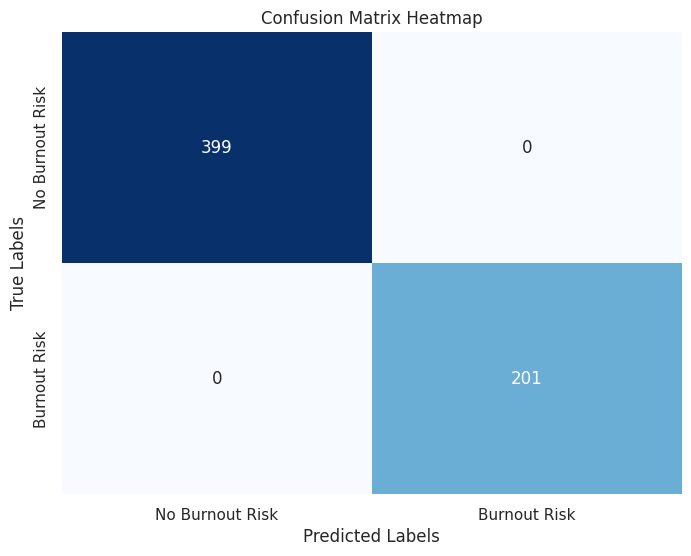

In [ ]:
# Evaluation of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

conf_matrix = confusion_matrix(y_test, y_pred)

# Use appropriate labels for the confusion matrix
# Assuming 'BurnoutRisk' is binary (0 and 1)
target_names = ['No Burnout Risk', 'Burnout Risk']


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False, xticklabels=target_names, yticklabels=target_names)

plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

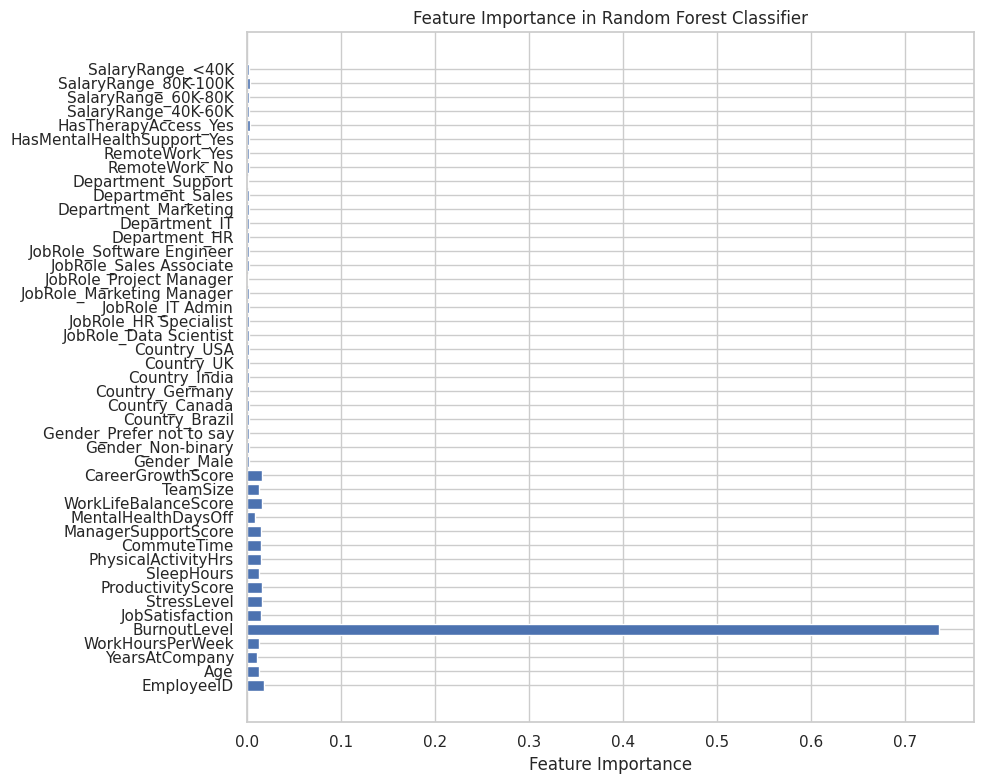

In [ ]:
# Feature importance
feature_importances = classifier.feature_importances_

# Get the feature names from the one-hot encoded DataFrame
feature_names = X.columns

plt.figure(figsize=(10, 8))
plt.barh(feature_names, feature_importances)
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Random Forest Classifier')
plt.tight_layout()
plt.show()

# Drop weak features
-------------------------------
---



In [ ]:
# Selecting 3 important features, using Random Forest importance
sorted_indices = np.argsort(feature_importances)[::-1]
top3_feature_names = feature_names[sorted_indices[:3]].tolist()

print("Top 3 Features:", top3_feature_names)
X_top3 = df[top3_feature_names]


Top 3 Features: ['BurnoutLevel', 'EmployeeID', 'StressLevel']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_top3, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Retrain and compare results
------------
---------------


In [ ]:
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "k-NN": KNeighborsClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name} Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print(f"{name} ROC AUC: {roc_auc_score(y_test, y_pred):.2f}\n")

Decision Tree Accuracy: 1.00
Decision Tree ROC AUC: 1.00

Random Forest Accuracy: 1.00
Random Forest ROC AUC: 1.00

k-NN Accuracy: 0.77
k-NN ROC AUC: 0.69



**SUMMARY : <BR/>
While comparing the results before and after considering the important features, it is observed that the Decision Tree and Random Forest regains the accuracy and the ROC AUC score while the k-NN model lacks both the scores while considering the important features, which implies that it is more sensitive to the feature reduction.**